In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout , Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2
import keras
import tensorflow as tf




import warnings
warnings.filterwarnings('ignore')

# Prepare and load dataset

In [3]:
x_train = []
y_train = []
for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(1)


for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(2)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(3)



In [4]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# Prepare and load data Test

In [5]:
x_test = []
y_test = []
for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/EOSINOPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/LYMPHOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(1)


for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/MONOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(2)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/NEUTROPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(3)


# Preprocessing the data

In [6]:
from tensorflow.keras.applications.resnet import preprocess_input

                                            

In [7]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [8]:
train_ds = preprocess_input(x_train)
valid_ds = preprocess_input(x_valid) 
test_ds = preprocess_input(x_test)

# Create the base model from the pre-trained model ResNet152

In [9]:
from tensorflow.keras.applications.resnet import ResNet152

base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (130,130,3))
for layer in base_model.layers:
  layer.trainable = False

234698864/234698864 [==============================] - 11s 0us/step


In [10]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(4 , activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# train the model

In [11]:
from tensorflow.keras.callbacks import EarlyStopping



history = model.fit(train_ds,y_train, validation_data= (valid_ds,y_valid),  
                              epochs=50,
                              verbose=1,callbacks=[tf.keras.callbacks.EarlyStopping
                               (monitor="val_loss",
                                patience=30,verbose=1,
                                restore_best_weights=True),
                               ])

Epoch 1/50
265/265 [==============================] - 70s 208ms/step - loss: 4.4789 - accuracy: 0.3485 - val_loss: 1.2659 - val_accuracy: 0.4170
Epoch 2/50
265/265 [==============================] - 51s 191ms/step - loss: 1.1983 - accuracy: 0.4737 - val_loss: 1.2226 - val_accuracy: 0.4103
Epoch 3/50
265/265 [==============================] - 54s 205ms/step - loss: 1.0099 - accuracy: 0.5639 - val_loss: 0.9591 - val_accuracy: 0.6091
Epoch 4/50
265/265 [==============================] - 50s 187ms/step - loss: 0.8773 - accuracy: 0.6290 - val_loss: 0.8793 - val_accuracy: 0.6473
Epoch 5/50
265/265 [==============================] - 50s 187ms/step - loss: 0.7454 - accuracy: 0.6973 - val_loss: 0.7490 - val_accuracy: 0.7115
Epoch 6/50
265/265 [==============================] - 50s 187ms/step - loss: 0.6775 - accuracy: 0.7288 - val_loss: 0.7042 - val_accuracy: 0.7122
Epoch 7/50
265/265 [==============================] - 49s 184ms/step - loss: 0.5954 - accuracy: 0.7657 - val_loss: 0.7161 - val_ac

# plot the loss and accuracy of the model

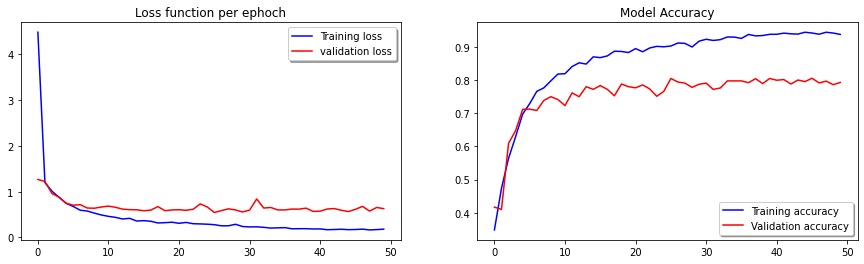

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Loss function per ephoch')
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Model Accuracy')
legend = ax[1].legend(loc='best', shadow=True)

# train & test loss and accuracy

In [13]:
train_loss, train_acc= model.evaluate(train_ds,y_train)
print('train acc:', train_acc)
print('train loss:', train_loss)

265/265 [==============================] - 32s 121ms/step - loss: 0.0506 - accuracy: 0.9903
train acc: 0.990310788154602
train loss: 0.05061757564544678


In [14]:
test_loss, test_acc = model.evaluate(test_ds,y_test)
print('test acc:', test_acc)
print('test loss:', test_loss)

3/3 [==============================] - 1s 288ms/step - loss: 1.5004 - accuracy: 0.6197
test acc: 0.6197183132171631
test loss: 1.5003827810287476
